# Introduction...

# 1. Flux Balance Analysis Process using Cobra Overview

## 1.1  Cobra FBA of _E. coli's_ Metabolism


Experiment ID: de68c20e-7bb3-11eb-9e39-f834416ad528
Created: 03/02/2021 at 16:03:22
Completed in 1.48 seconds


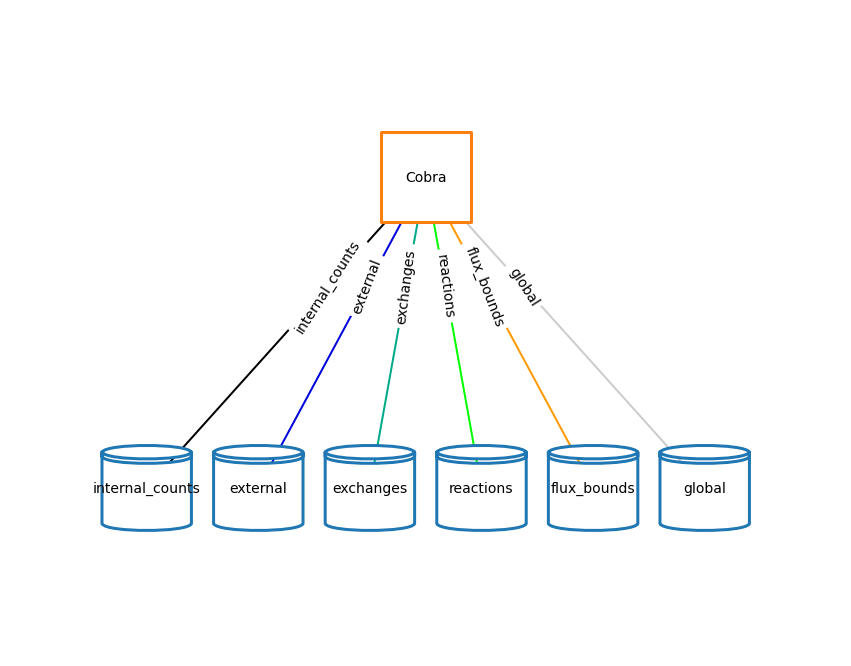

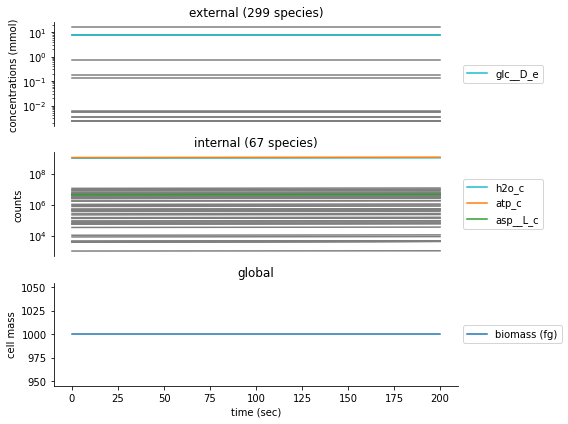

In [4]:
from bioscrape_cobra.simulate import simulate_cobra
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

#Simulate Cobra
cobra_timeseries, cobra = simulate_cobra(total_time = 200)

#Plot the Simulation Topology
fig_topology = plot_topology(cobra)

#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)

## 1.2 Adding a Derivers to Update Biomass and Volume


Experiment ID: e43db936-7bb3-11eb-9bba-f834416ad528
Created: 03/02/2021 at 16:03:32
Completed in 3.51 seconds


C:\Users\wp_ix\miniconda3\lib\site-packages\bioscrape_cobra-0.0.1-py3.8.egg\bioscrape_cobra\plot.py:187: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(grid[2, 0])


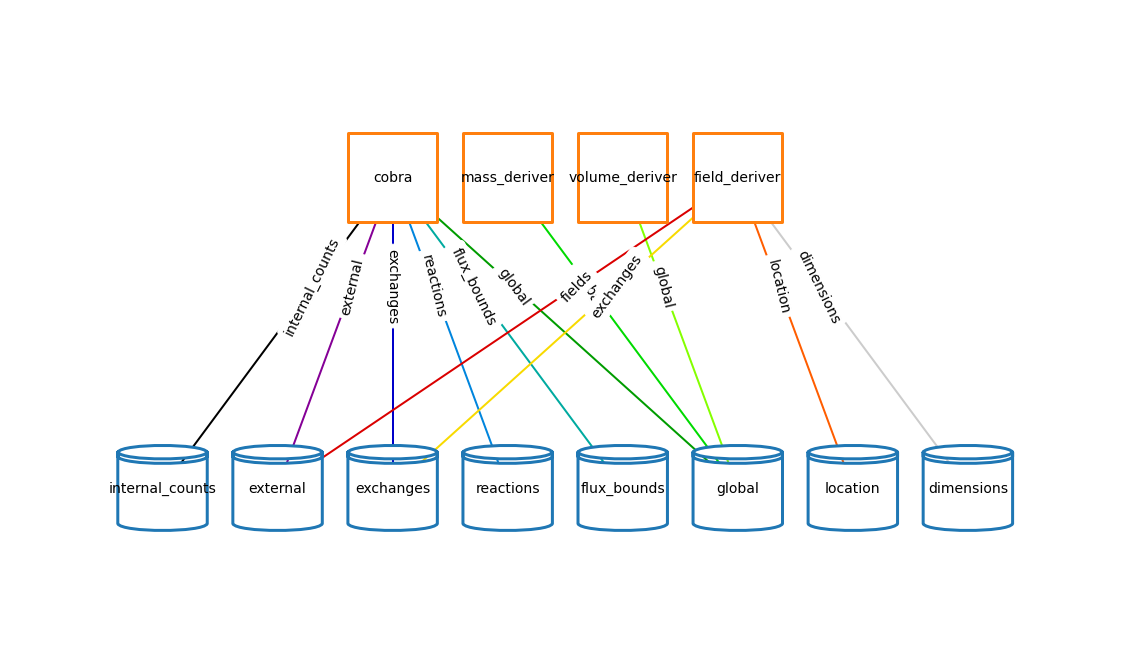

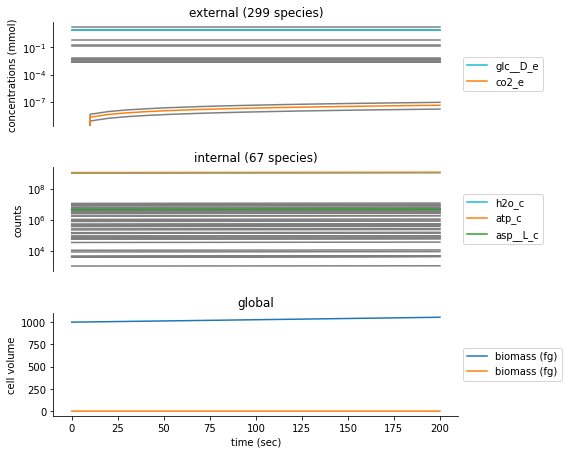

In [5]:
from bioscrape_cobra.simulate import simulate_cobra_composite
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

#Simulate Cobra Composite
cobra_timeseries, cobra_composite = simulate_cobra_composite(total_time = 200)

#Plot the Topology
fig_topology = plot_topology(cobra_composite)

#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)

# 2. Chemical Reaction Networks with Bioscrape Overview

## 2.1 A Deterministic Bioscrape Simulation of the Lac Operon CRN


Experiment ID: 04c84b86-7bb4-11eb-93d3-f834416ad528
Created: 03/02/2021 at 16:04:26
Completed in 0.171581 seconds


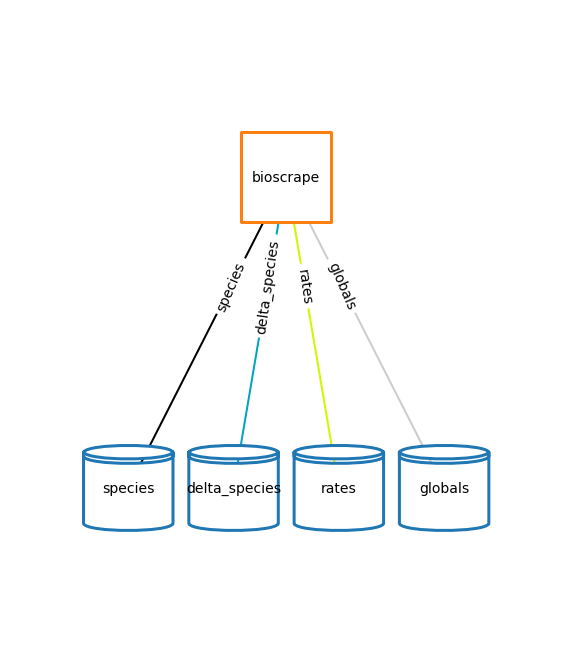

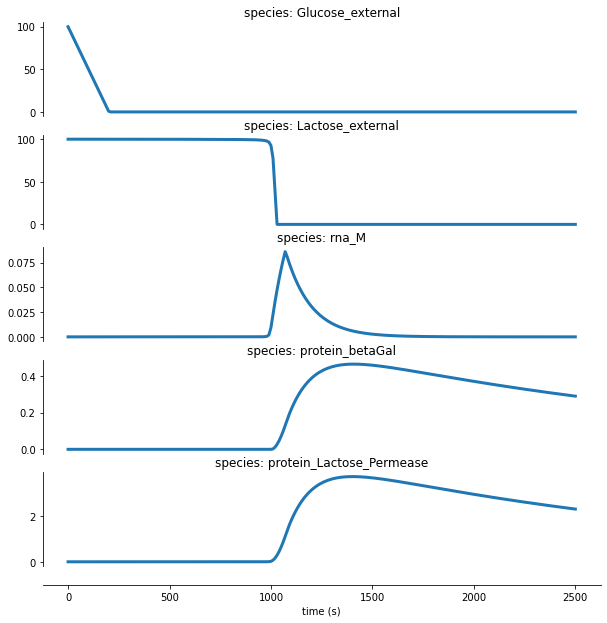

In [7]:
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Deterministically
bioscrape_timeseries, bioscrape_composite = simulate_bioscrape(
    total_time = 2500, initial_glucose = 100, initial_lactose = 100)

#plot the Topology
fig_topology = plot_topology(bioscrape_composite)

#Plot the CRN Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries, 
    variables = species_to_plot
)

## 2.2 A Deterministic Bioscrape Simulation of the Lac Operon CRN


Experiment ID: 0b0fe938-7bb4-11eb-9cb0-f834416ad528
Created: 03/02/2021 at 16:04:37
Completed in 2.41 seconds


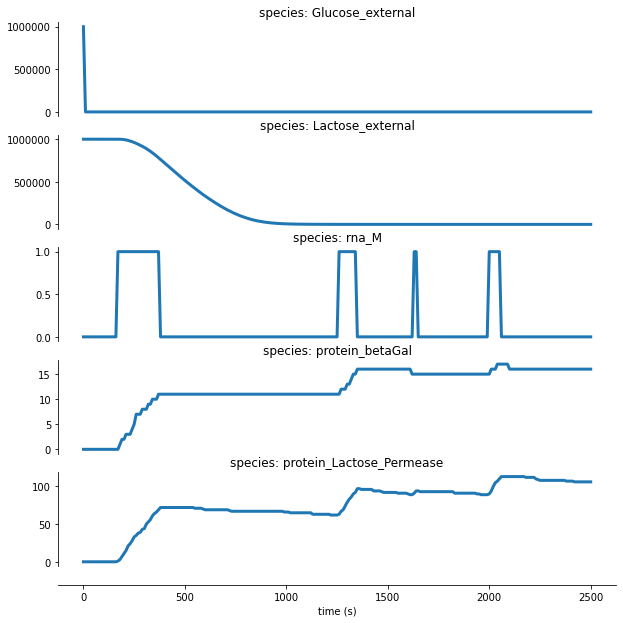

In [9]:
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Stochastically
bioscrape_timeseries, bioscrape_composite = simulate_bioscrape(
    total_time = 2500, stochastic = True, initial_glucose = 10**6, initial_lactose = 10**6)

#Plot a Stochastic Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries, 
    variables = species_to_plot
)

# 3. Multibody and Spatial Simulations

## 3.1 Growing and Dividing Cells


Experiment ID: 15b18810-7bb4-11eb-9474-f834416ad528
Created: 03/02/2021 at 16:04:55
Completed in 0.398135 seconds


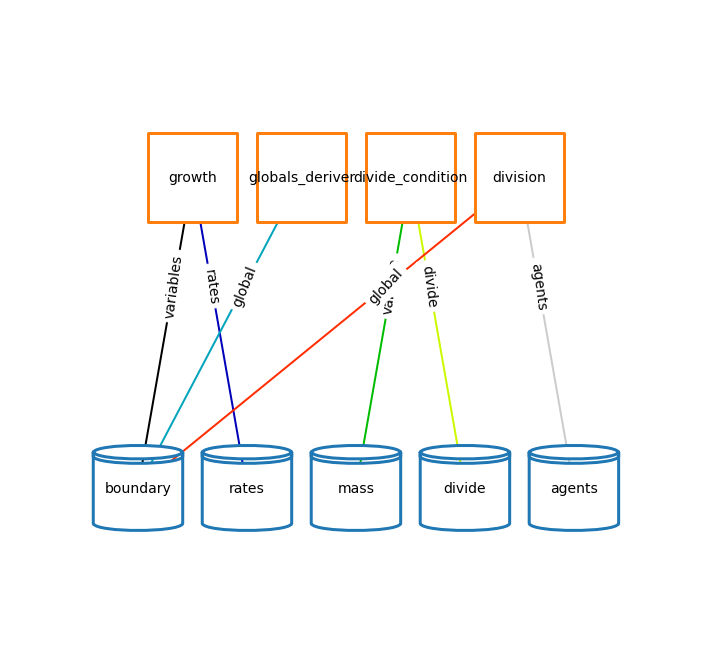

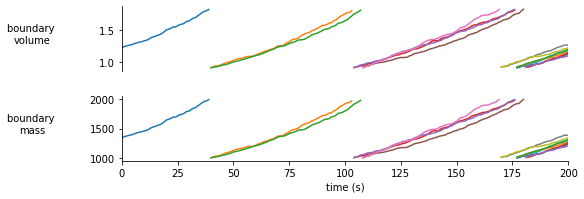

In [10]:
from bioscrape_cobra.simulate import simulate_grow_divide
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_multigen

#Simulate Growing, Dividing Cells
grow_divide_timeseries, grow_divide_composite = simulate_grow_divide(
    total_time = 200, growth_rate = .01, growth_noise = .005)

#Plot Topology
fig_topology = plot_topology(grow_divide_composite)

#Plot Cell Trajectories
fig_trajectories = plot_multigen(grow_divide_timeseries, variables = [("boundary", "mass"), ("boundary", "volume")])

## 3.2 A Lattice Model of Diffusion


Experiment ID: aabea9d5-7bb4-11eb-8a44-f834416ad528
Created: 03/02/2021 at 16:09:05
Completed in 0.629323 seconds


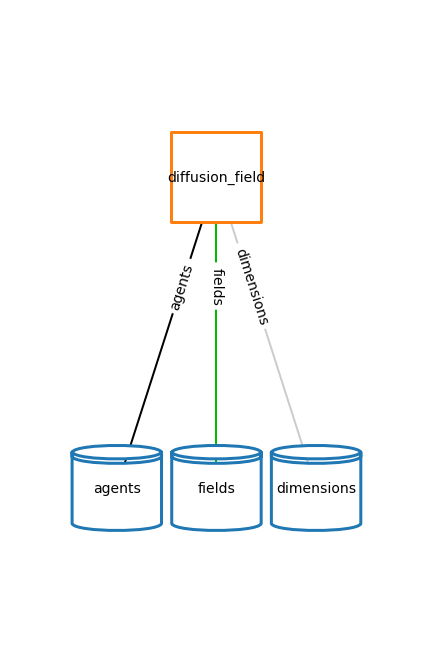

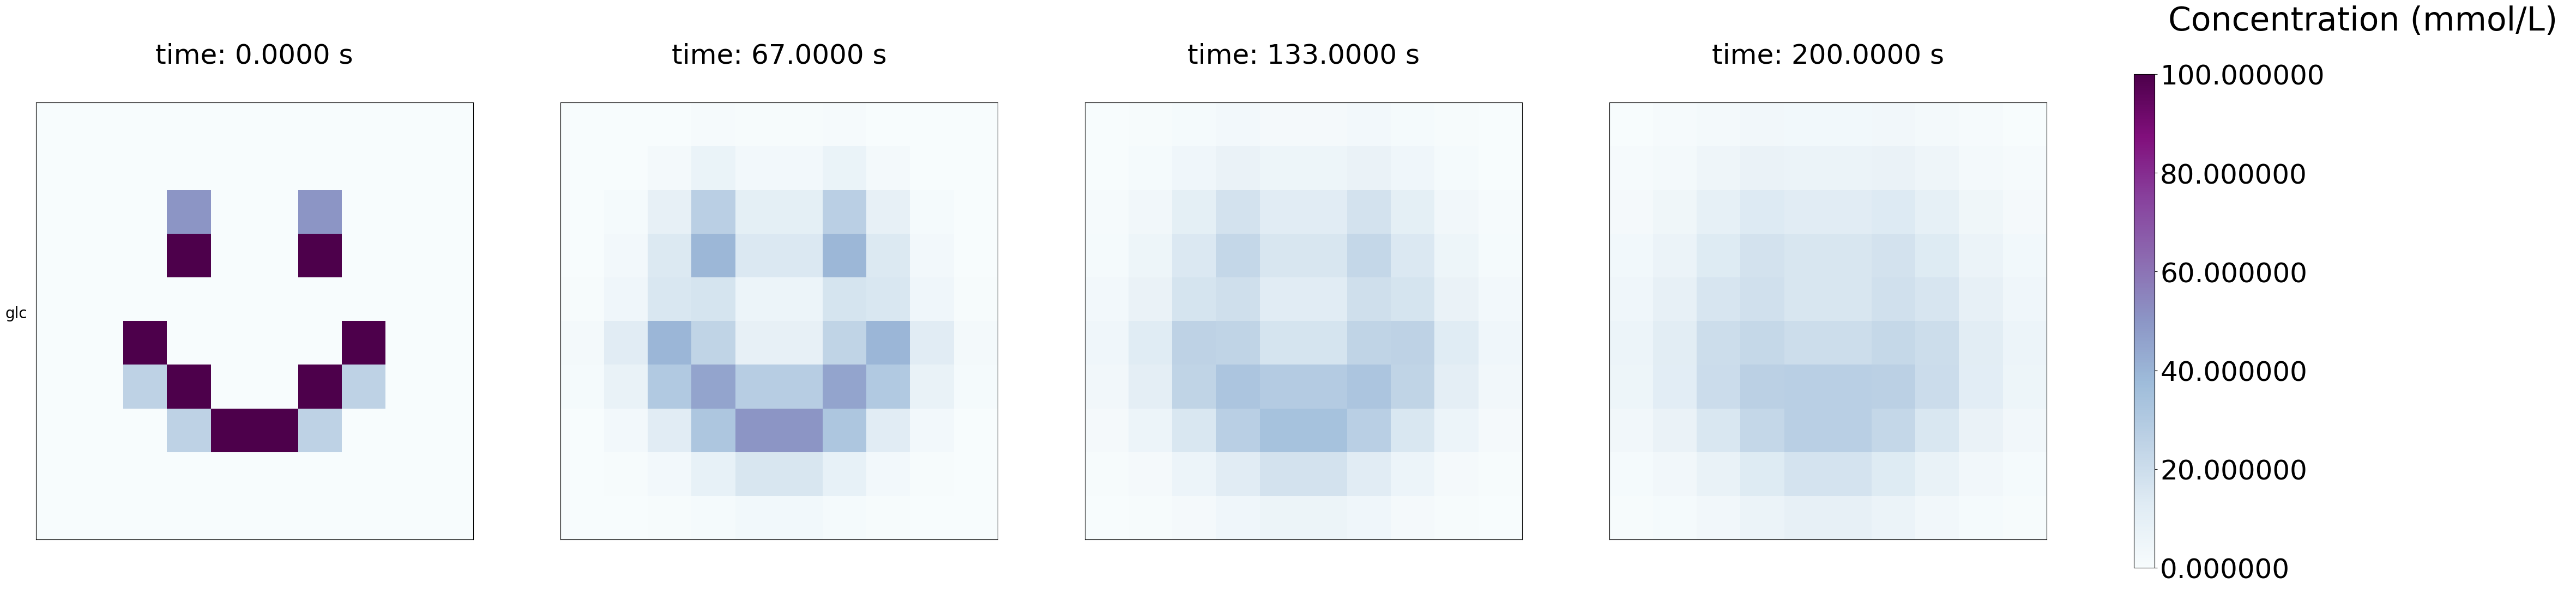

In [5]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_diffusion
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np
import matplotlib as plt

#Grid Size
N = 10
bounds = [N, N]

#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[3, 6] = 100
initial_state[3, 7] = 50
initial_state[6, 6] = 100
initial_state[6, 7] = 50
initial_state[2, 4] = 100
initial_state[2, 3] = 25
initial_state[3, 3] = 100
initial_state[3, 2] = 25
initial_state[4, 2] = 100
initial_state[5, 2] = 100
initial_state[6, 2] = 25
initial_state[6, 3] = 100
initial_state[7, 3] = 25
initial_state[7, 4] = 100

#Simulate diffusion
diffusion_data, diffusion_composite = simulate_diffusion(
    total_time = 200, 
    initial_state = initial_state, 
    bounds = bounds,
    diffusion_rate = .005)

#Plot Topology
fig_topology = plot_topology(diffusion_composite)

#Reformat Data
agents, fields = format_snapshot_data(diffusion_data)

#Plot Simulation Snapshots
fig2 = plot_snapshots( 
    bounds=bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4
)


## 3.3 Placing Agents on the Lattice

!!!!!!!!!!!!!!!!!!

Cannot Plot This Topology

!!!!!!!!!!!!!!!!!!
 <class 'vivarium.core.process.Composite'>: {'processes': {'agents': {'0': {'growth': <vivarium.processes.growth_rate.GrowthRate object at 0x0000023F14F95850>, 'globals_deriver': <vivarium_multibody.processes.derive_globals.DeriveGlobals object at 0x0000023F14F95FD0>, 'divide_condition': <vivarium.processes.divide_condition.DivideCondition object at 0x0000023F14F24040>, 'division': <vivarium.processes.meta_division.MetaDivision object at 0x0000023F14F24220>}}, 'multibody': <vivarium_multibody.processes.multibody_physics.Multibody object at 0x0000023F14F956D0>, 'diffusion': <vivarium_multibody.processes.diffusion_field.DiffusionField object at 0x0000023F14F95880>}, 'topology': {'agents': {'0': {'growth': {'variables': ('boundary',), 'rates': ('rates',)}, 'globals_deriver': {'global': ('boundary',)}, 'divide_condition': {'variable': ('boundary', 'mass'), 'divide': ('boundary', 'divide')}, 'division': {'global': ('boundary'

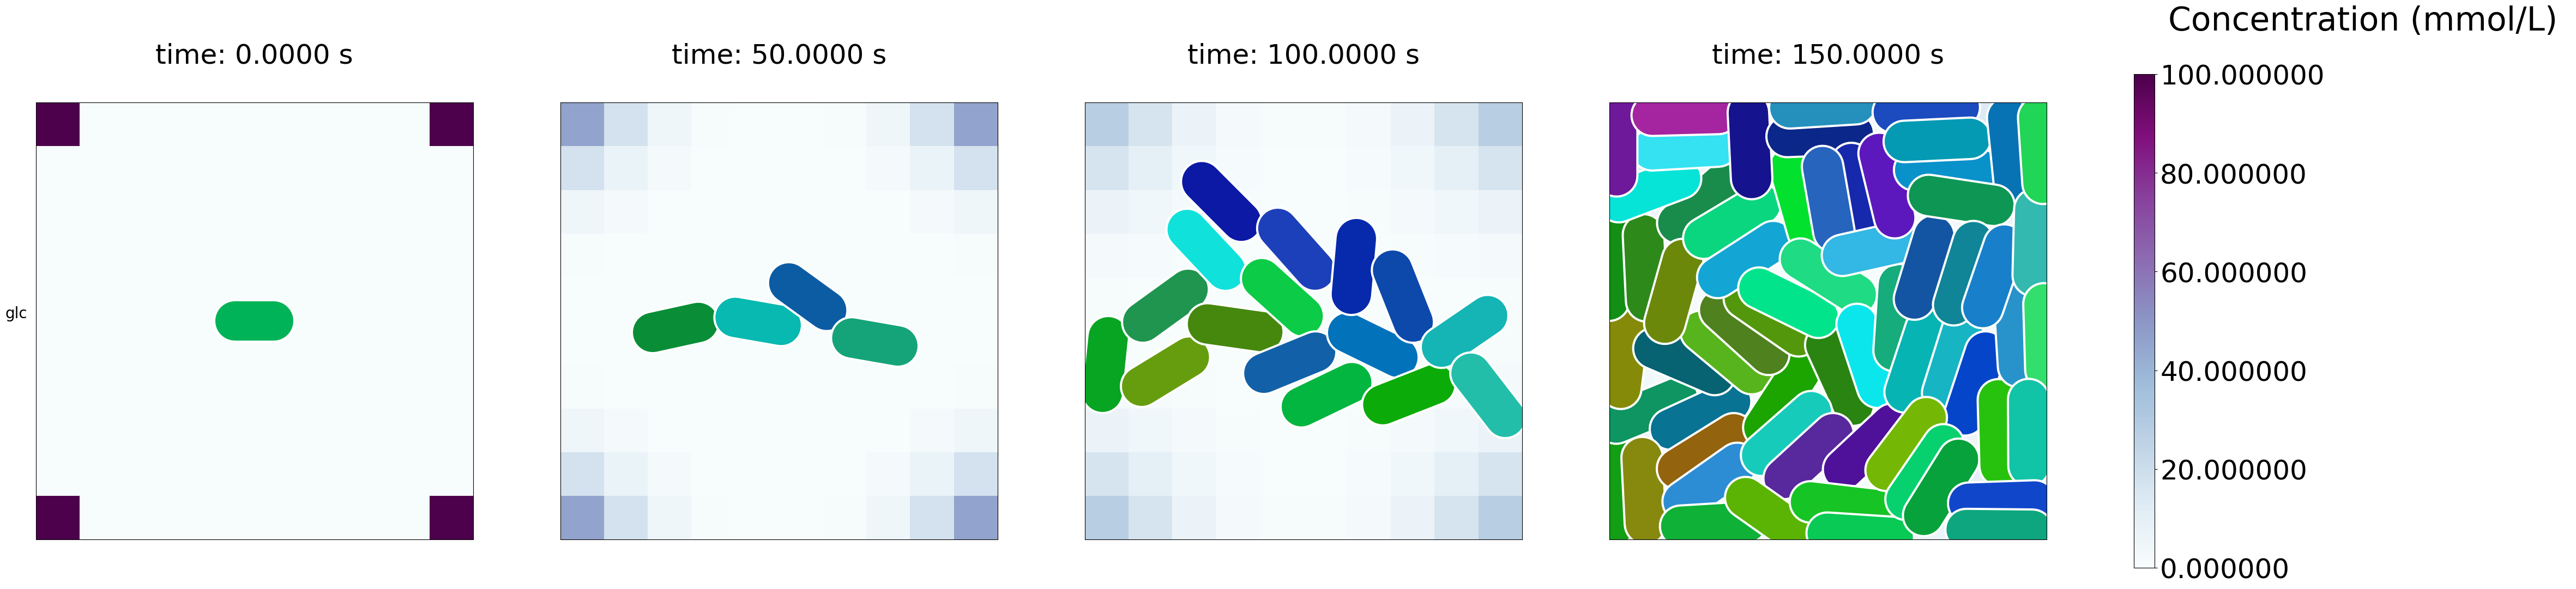

In [11]:
from bioscrape_cobra.simulate import simulate_grow_divide_lattice, get_lattice_grow_divide_composite
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np

#Grid Size
N = 10
bounds = [N, N]
#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[0, 0] = 100
initial_state[0, -1] = 100
initial_state[-1, 0] = 100
initial_state[-1, -1] = 100

#Create the a Composite with Agents (Cells) on a Lattice
lattice_grow_divide_composite = get_lattice_grow_divide_composite(
    bounds = bounds, 
    initial_concentration = initial_state,
    diffusion_rate = .01)


try:
    #Plot the topology
    fig_topology = plot_topology(lattice_grow_divide_composite)
except KeyError:
    print("!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n!!!!!!!!!!!!!!!!!!\n", lattice_grow_divide_composite)

#Simulate the Composite
lattice_grow_divide_data = simulate_grow_divide_lattice(lattice_grow_divide_composite, total_time = 150)

#Plot snapshots of the simulation
agents, fields = format_snapshot_data(lattice_grow_divide_data)

fig2 = plot_snapshots( 
    bounds=bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4
)

# 4. Connecting Bioscrape and Cobra in an Ensemble of Growing, Dividing Cells on a 2D Lattice

In [1]:
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from vivarium.plots.topology import plot_topology

from bioscrape_cobra import helper

print(helper.get_package_path())
# Show full topology here
#bsc_det_composite = BioscrapeCOBRAdeterministic()
#fig_topology = plot_topology(bsc_det_composite)


ModuleNotFoundError: No module named 'bioscrape_cobra'